#**Toxic Tweets**

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('FinalBalancedDataset.csv')
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [3]:
df["Toxicity"].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [6]:
df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
56740    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741    you've gone and broke the wrong heart baby, an...
56742    young buck wanna eat!!.. dat nigguh like I ain...
56743                youu got wild bitches tellin you lies
56744    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 56745, dtype: object

In [7]:
# Replacing punctuations with space
df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z]", " ")

# Re ordering columns
df = df[['tweet','tweet_processed','Toxicity']]

<ipython-input-7-40cefca05b41>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z]", " ")


In [8]:
df


,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,0
2,bihday your majesty,bihday your majesty,0
3,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,factsguide society now motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie LifeAsKing ...,1
56741,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby an...,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,1


In [9]:
# make entire text lowercase
df['tweet_processed'] = [row.lower() for row in df['tweet_processed']]

In [10]:
df['tweet_processed']

0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
56740    you s a muthaf   in lie         lifeasking    ...
56741    you ve gone and broke the wrong heart baby  an...
56742    young buck wanna eat     dat nigguh like i ain...
56743                youu got wild bitches tellin you lies
56744      ruffled   ntac eileen dahlia   beautiful col...
Name: tweet_processed, Length: 56745, dtype: object

In [11]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['user','rt','amp','go','want','time','day','one','look','new','even','video','t','u','co','pa','us','ur','sta','ve','te','say','try','sunday','use','music','bhiday','put','two','guy','gon','w','monday','read','fathersday','gt','via','na','twitter','saturday','polar bear','way','n','may','im','b','post','ye','hea','forex','summer','make','see','weekend','back','tweet','hoe','someone','game','much','many','dont','cuz','pay','give','wit','make','bro','wan','da','lil','em','tho','aint','still','tf','oh','ta','yo','nah','ho','stfu','tryna','nig','kieffer','jason']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['tweet_processed'] = [remove_stopwords(r) for r in df['tweet_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df


,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,0
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause offer wheelchair vans...,0
2,bihday your majesty,bihday majesty,0
3,#model i love u take with u all the time in ...,model love take,0
4,factsguide: society now #motivation,factsguide society motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearls corey emanuel rig...,1
56741,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck eat dat nigguh like fuckin dis,1
56743,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,1


In [13]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['tweet_processed'] = df['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
df.tail()

,tweet,tweet_processed,Toxicity
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearl corey emanuel righ...,1
56741,"you've gone and broke the wrong heart baby, an...",go break wrong heart baby drive redneck crazy,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck eat dat nigguh like fuckin dis,1
56743,youu got wild bitches tellin you lies,youu get wild bitch tellin lie,1
56744,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,ruffle ntac eileen dahlia beautiful color comb...,0


# **Word Cloud**

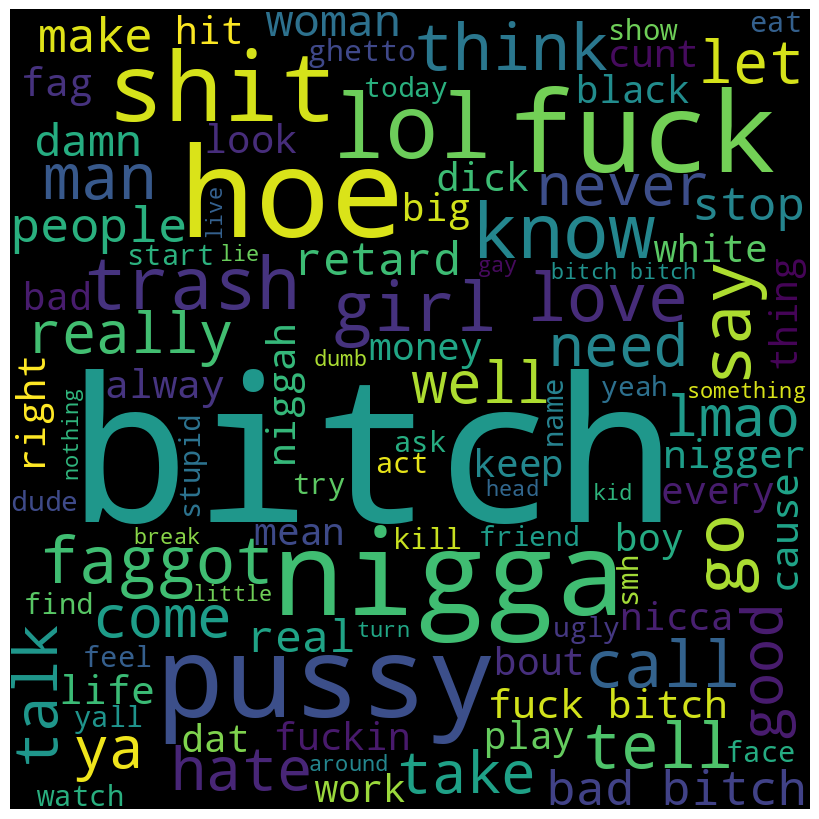

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Toxicity'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])


wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=100).generate(all_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



In [16]:
tweet = df['tweet_processed']
labels = df['Toxicity']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(tweet)

# TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(tweet)

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

In [18]:
df_bow = pd.DataFrame(X_bow.todense(),columns = sorted(vectorizer.vocabulary_))
df_bow

,aa,aaa,aaaaa,aaaaaaaaand,aaaaaand,aaaaah,aaaaand,aaadontplayy,aaahh,aaahhhh,...,zz,zzachbarness,zzb,zzhr,zzkagxivlu,zzz,zzzentropy,zzzquil,zzzzzz,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
xb_train = scaler.fit_transform(X_train_bow)
xb_test = scaler.transform(X_test_bow)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
xt_train = scaler.fit_transform(X_train_tfidf)
xt_test = scaler.transform(X_test_tfidf)

#**Decision Tree (Bag of Words)**

In [21]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':range(3,50)}

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_bow, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(3, 50),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [22]:
rcv.best_params_

{'splitter': 'random', 'max_depth': 40, 'criterion': 'gini'}

In [23]:
rcv.best_score_

0.9071064415970825

In [24]:
finalmodel_dtc_bagofwords = model.set_params(**rcv.best_params_)
finalmodel_dtc_bagofwords.fit(X_train_bow, y_train)

DecisionTreeClassifier(max_depth=40, splitter='random')

In [25]:
preds_dtb = finalmodel_dtc_bagofwords.predict(X_test_bow)

Precision: 0.9512482336316533
Recall: 0.8281730572072996
F1-score: 0.885454346158062


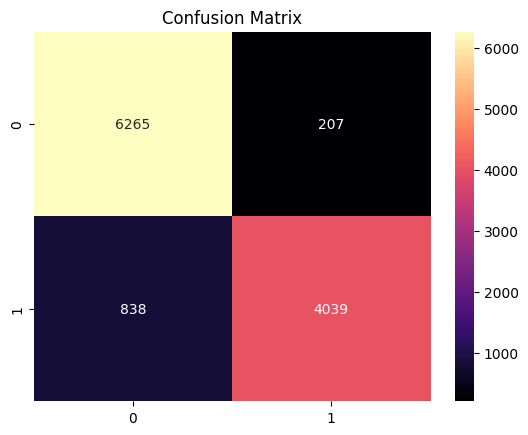

<Figure size 600x600 with 0 Axes>

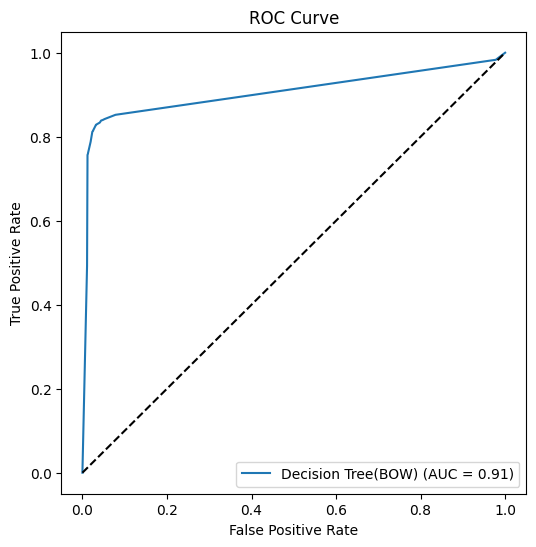

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_dtb)
recall = recall_score(y_test, preds_dtb)
f1 = f1_score(y_test, preds_dtb)
cm_dtb = confusion_matrix(y_test, preds_dtb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_dtb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_dtb = finalmodel_dtc_bagofwords.predict_proba(X_test_bow)[:, 1]
roc_auc_dtb = roc_auc_score(y_test, y_scores_dtb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dtb)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Decision Tree(BOW) (AUC = {:.2f})'.format(roc_auc_dtb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Decision Tree (TF-IDF)**

In [48]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':range(3,50)}

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_tfidf, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(3, 50),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [49]:
rcv.best_params_

{'splitter': 'best', 'max_depth': 47, 'criterion': 'log_loss'}

In [50]:
rcv.best_score_

0.9064234887791113

In [51]:
finalmodel_dtc_tfidf = model.set_params(**rcv.best_params_)
finalmodel_dtc_tfidf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=47)

In [52]:
preds_dtt = finalmodel_dtc_tfidf.predict(X_test_tfidf)

Precision: 0.9507075471698113
Recall: 0.8265327045314743
F1-score: 0.8842821103433148


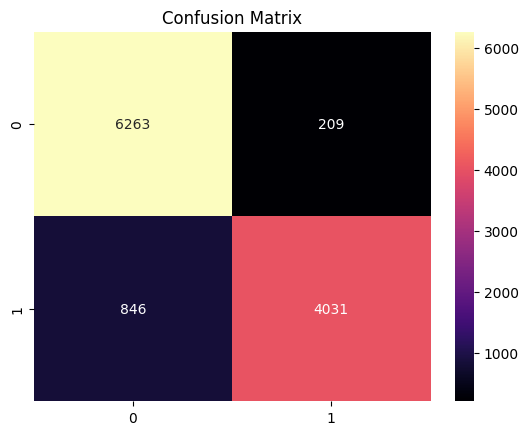

<Figure size 600x600 with 0 Axes>

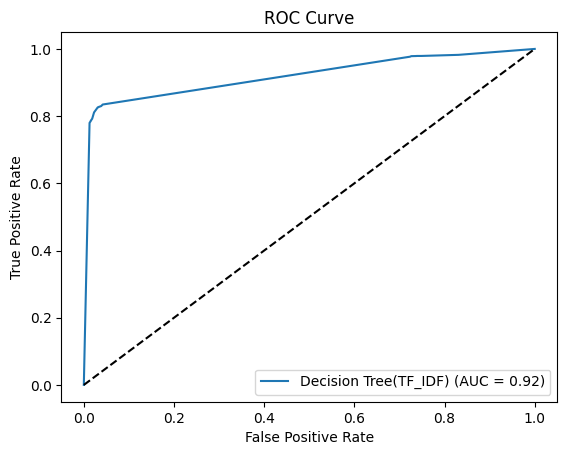

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_dtt)
recall = recall_score(y_test, preds_dtt)
f1 = f1_score(y_test, preds_dtt)
cm_dtt = confusion_matrix(y_test, preds_dtt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_dtt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_dtt = finalmodel_dtc_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_dtt = roc_auc_score(y_test, y_scores_dtt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dtt)
plt.plot(fpr, tpr, label='Decision Tree(TF_IDF) (AUC = {:.2f})'.format(roc_auc_dtt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Random Forest (Bag of Words)**

In [54]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# params = {'criterion':['gini','entropy'],'n_estimators':range(1,10),'max_features':[None, 'sqrt', 'log2', 0.5, 10]}
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# skf = StratifiedKFold(n_splits = 10)

# rcv_rfc = RandomizedSearchCV(rfc, param_distributions = params, cv = skf, scoring = 'accuracy')
# rcv_rfc.fit(X_train_bow, y_train)


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_bow, y_train)


RandomForestClassifier()

In [56]:
preds_rfb = rfc.predict(X_test_bow)

Precision: 0.9222457627118644
Recall: 0.8925568997334427
F1-score: 0.907158487027196


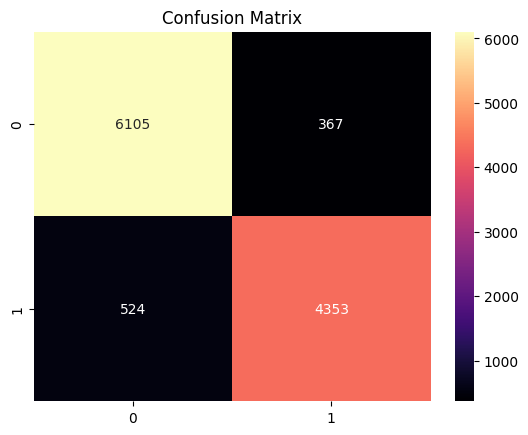

<Figure size 600x600 with 0 Axes>

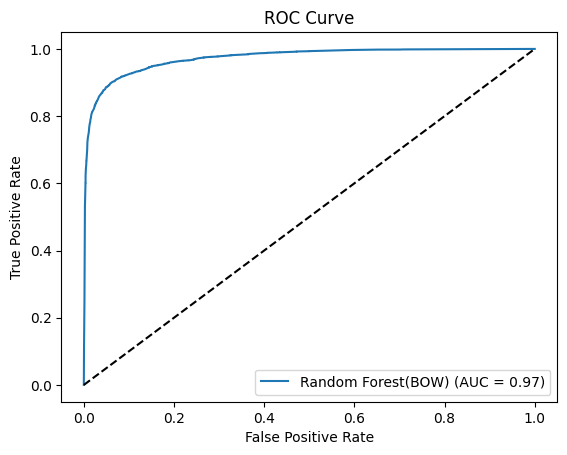

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_rfb)
recall = recall_score(y_test, preds_rfb)
f1 = f1_score(y_test, preds_rfb)
cm_rfb = confusion_matrix(y_test, preds_rfb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_rfb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_rfb = rfc.predict_proba(X_test_bow)[:, 1]
roc_auc_rfb = roc_auc_score(y_test, y_scores_rfb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rfb)
plt.plot(fpr, tpr, label='Random Forest(BOW) (AUC = {:.2f})'.format(roc_auc_rfb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Random Forest (TF-IDF)**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [59]:
preds_rft = rfc.predict(X_test_tfidf)

Precision: 0.9344827586206896
Recall: 0.8890711502973139
F1-score: 0.9112115162341073


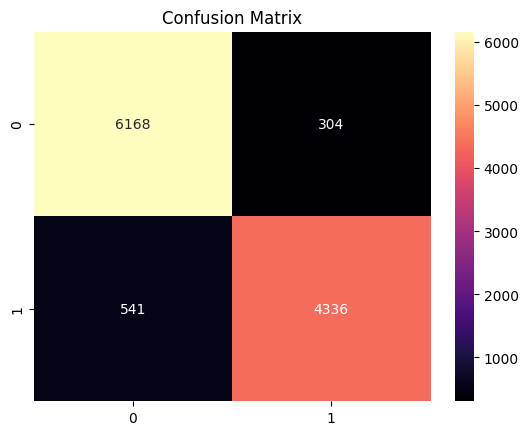

<Figure size 600x600 with 0 Axes>

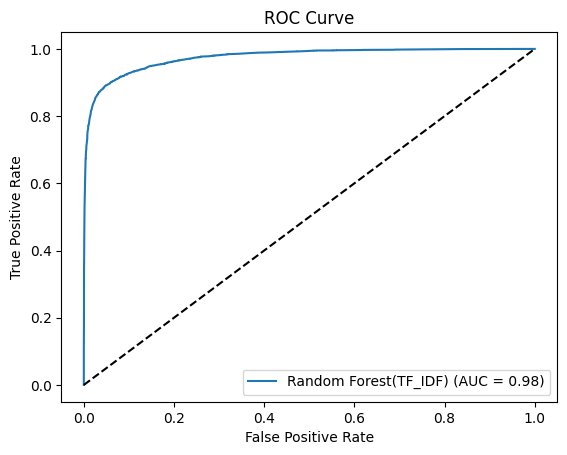

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_rft)
recall = recall_score(y_test, preds_rft)
f1 = f1_score(y_test, preds_rft)
cm_rft = confusion_matrix(y_test, preds_rft)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_rft, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_rft = rfc.predict_proba(X_test_tfidf)[:, 1]
roc_auc_rft = roc_auc_score(y_test, y_scores_rft)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rft)
plt.plot(fpr, tpr, label='Random Forest(TF_IDF) (AUC = {:.2f})'.format(roc_auc_rft))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Navie Bayes (Bag of Words)**

In [61]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)


MultinomialNB()

In [62]:
preds_nbb = nb.predict(X_test_bow)

Precision: 0.8633942161339422
Recall: 0.9304900553619028
F1-score: 0.8956873581367808


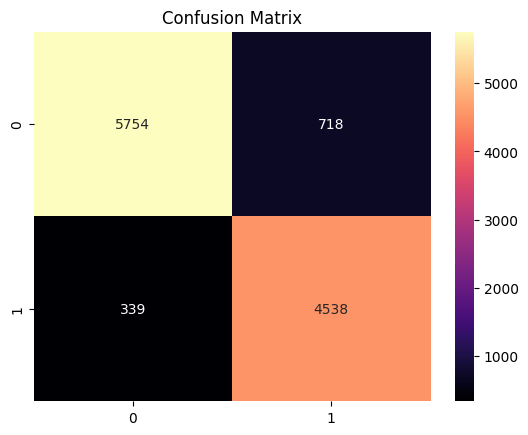

<Figure size 600x600 with 0 Axes>

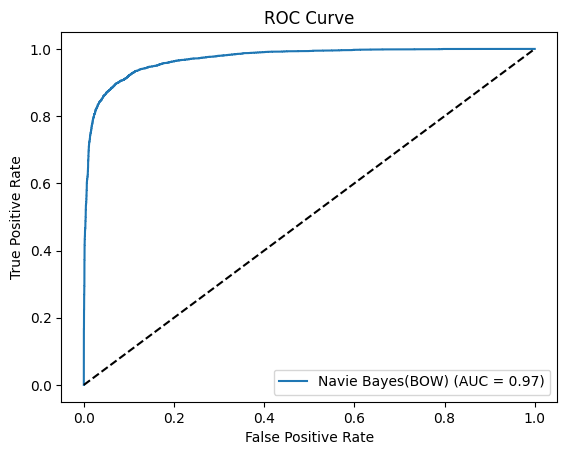

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_nbb)
recall = recall_score(y_test, preds_nbb)
f1 = f1_score(y_test, preds_nbb)
cm_nbb = confusion_matrix(y_test, preds_nbb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_nbb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_nbb = nb.predict_proba(X_test_bow)[:, 1]
roc_auc_nbb = roc_auc_score(y_test, y_scores_nbb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nbb)
plt.plot(fpr, tpr, label='Navie Bayes(BOW) (AUC = {:.2f})'.format(roc_auc_nbb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Navie Bayes (TF_IDF)**

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [65]:
preds_nbt = nb.predict(X_test_tfidf)

Precision: 0.8939235748590519
Recall: 0.877793725651015
F1-score: 0.8857852265673495


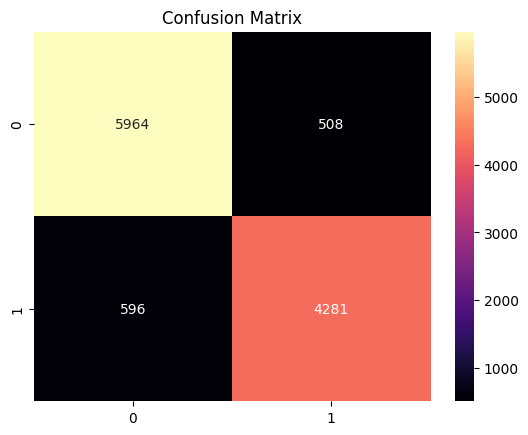

<Figure size 600x600 with 0 Axes>

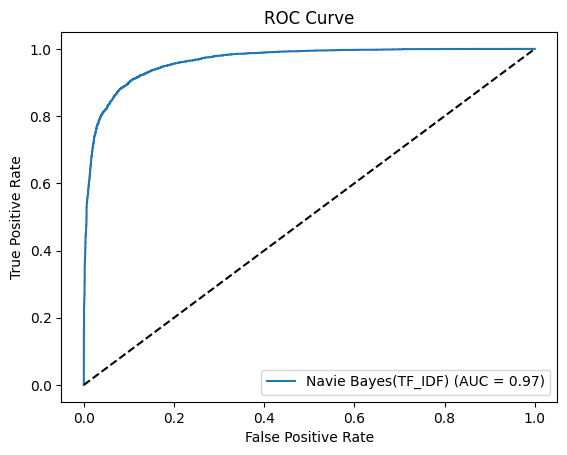

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_nbt)
recall = recall_score(y_test, preds_nbt)
f1 = f1_score(y_test, preds_nbt)
cm_nbt = confusion_matrix(y_test, preds_nbt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_nbt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_nbt = nb.predict_proba(X_test_tfidf)[:, 1]
roc_auc_nbt = roc_auc_score(y_test, y_scores_nbt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nbt)
plt.plot(fpr, tpr, label='Navie Bayes(TF_IDF) (AUC = {:.2f})'.format(roc_auc_nbt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**K-NN Classifier(Bag Of Words)**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(0,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(X_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skle

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(0, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [68]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'cosine'}

In [69]:
rcv_knn.best_score_

0.8905630483863376

In [70]:
finalmodel_knnb_bow = knn_bow.set_params(**rcv_knn.best_params_)
finalmodel_knnb_bow.fit(X_train_bow, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=9, weights='distance')

In [71]:
preds_knnb = finalmodel_knnb_bow.predict(X_test_bow)

Precision: 0.8865690916917779
Recall: 0.8445765839655526
F1-score: 0.865063530400084


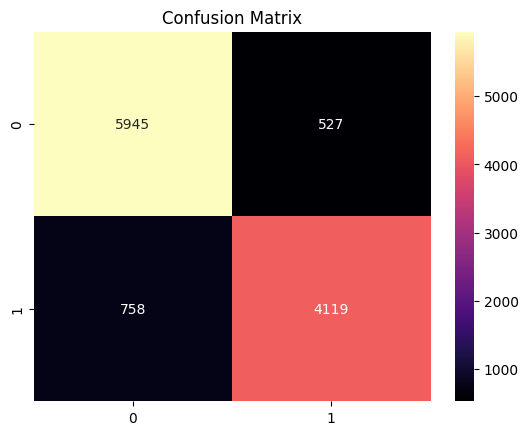

<Figure size 600x600 with 0 Axes>

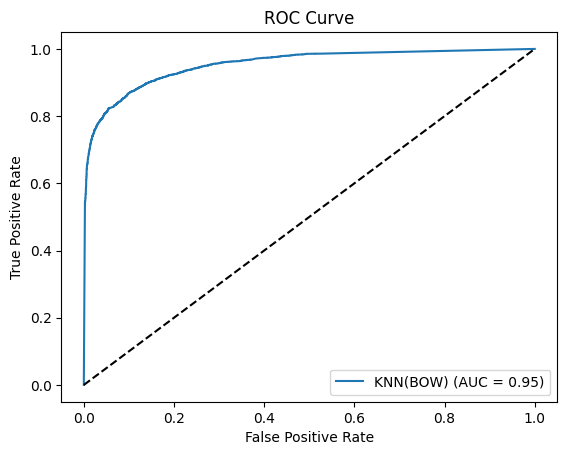

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_knnb)
recall = recall_score(y_test, preds_knnb)
f1 = f1_score(y_test, preds_knnb)
cm_knnb = confusion_matrix(y_test, preds_knnb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_knnb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_knnb = finalmodel_knnb_bow.predict_proba(X_test_bow)[:, 1]
roc_auc_knnb = roc_auc_score(y_test, y_scores_knnb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knnb)
plt.plot(fpr, tpr, label='KNN(BOW) (AUC = {:.2f})'.format(roc_auc_knnb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**K-NN Classifier(TF_IDF)**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(0,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn_tfidf = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn_tfidf.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(0, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [74]:
rcv_knn_tfidf.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'metric': 'cosine'}

In [75]:
rcv_knn_tfidf.best_score_

0.8333113546146332

In [76]:
finalmodel_knnt_tfidf = knn_bow.set_params(**rcv_knn_tfidf.best_params_)
finalmodel_knnt_tfidf.fit(X_train_tfidf, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=7)

In [77]:
preds_knnt = finalmodel_knnt_tfidf.predict(X_test_tfidf)

Precision: 0.8277439024390244
Recall: 0.7793725651014968
F1-score: 0.8028302883092195


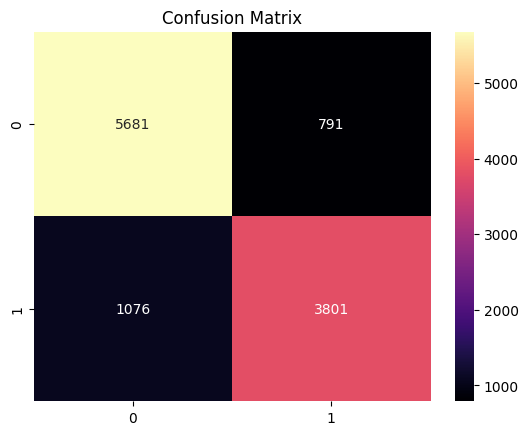

<Figure size 600x600 with 0 Axes>

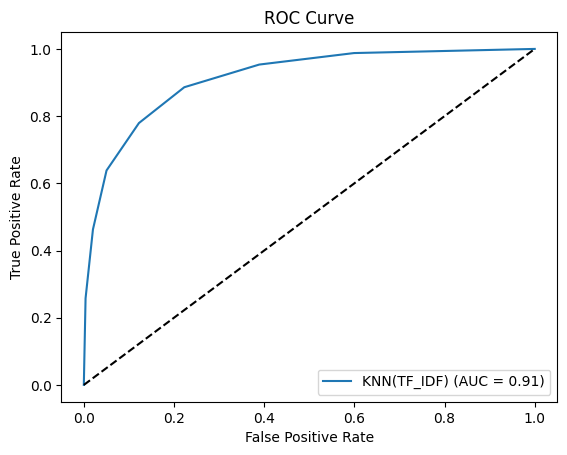

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_knnt)
recall = recall_score(y_test, preds_knnt)
f1 = f1_score(y_test, preds_knnt)
cm_knnt = confusion_matrix(y_test, preds_knnt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_knnt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_knnt = finalmodel_knnt_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_knnt = roc_auc_score(y_test, y_scores_knnt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knnt)
plt.plot(fpr, tpr, label='KNN(TF_IDF) (AUC = {:.2f})'.format(roc_auc_knnt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **SVM(Bag Of Words)**

In [79]:
# from sklearn.svm import SVC
# svm_bow = SVC(probability=True)
# params = {'C':[0.1,0.01,1],
#           'kernel':['linear']}
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# skf = StratifiedKFold(n_splits = 10)

# rcv_knn_svm = RandomizedSearchCV(svm_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
# rcv_knn_svm.fit(X_train_bow, y_train)

In [80]:
from sklearn.svm import SVC
svm_bow = SVC(probability=True)
svm_bow.fit(X_train_bow, y_train)


SVC(probability=True)

In [81]:
preds_svmb = svm_bow.predict(X_test_bow)


Precision: 0.9627401064568387
Recall: 0.8529833914291572
F1-score: 0.9045444661883019


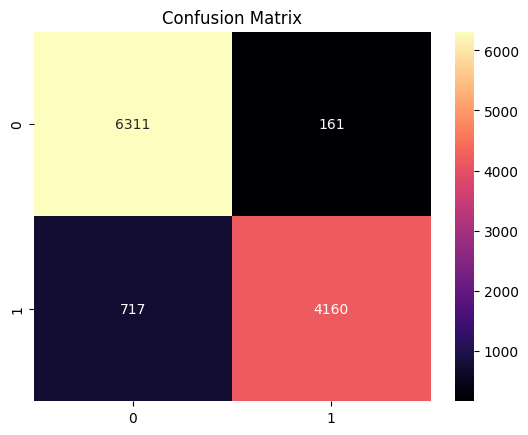

<Figure size 600x600 with 0 Axes>

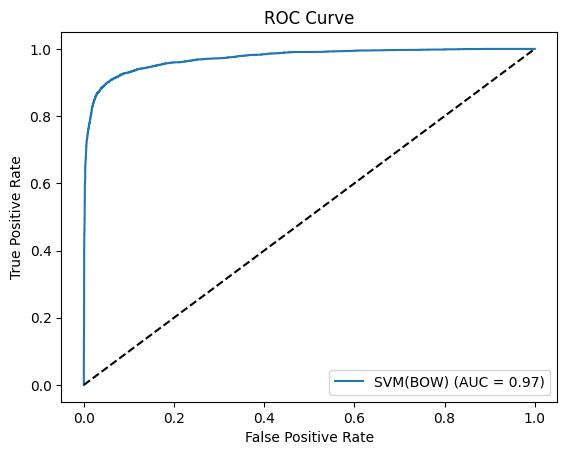

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_svmb)
recall = recall_score(y_test, preds_svmb)
f1 = f1_score(y_test, preds_svmb)
cm_svmb = confusion_matrix(y_test, preds_svmb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_svmb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_svmb = svm_bow.predict_proba(X_test_bow)[:, 1]
roc_auc_svmb = roc_auc_score(y_test, y_scores_svmb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svmb)
plt.plot(fpr, tpr, label='SVM(BOW) (AUC = {:.2f})'.format(roc_auc_svmb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **SVM(TF_IDF)**

In [83]:
from sklearn.svm import SVC
svm_tfidf = SVC(probability=True)
svm_tfidf.fit(X_train_tfidf, y_train)


SVC(probability=True)

In [84]:
preds_svmt = svm_tfidf.predict(X_test_tfidf)


Precision: 0.9633387133963569
Recall: 0.8566741849497642
F1-score: 0.9068808335142174


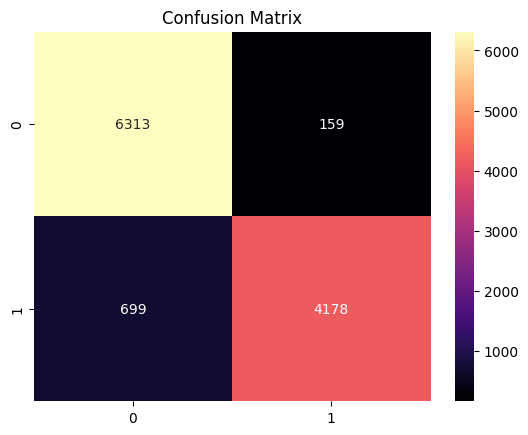

<Figure size 600x600 with 0 Axes>

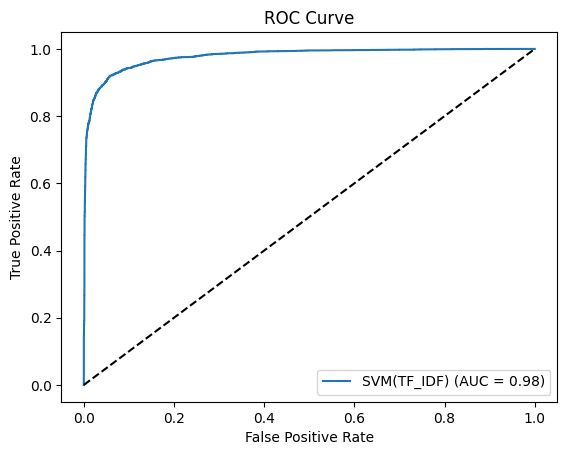

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_svmt)
recall = recall_score(y_test, preds_svmt)
f1 = f1_score(y_test, preds_svmt)
cm_svmt = confusion_matrix(y_test, preds_svmt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_svmt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_svmt = svm_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_svmt = roc_auc_score(y_test, y_scores_svmt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svmt)
plt.plot(fpr, tpr, label='SVM(TF_IDF) (AUC = {:.2f})'.format(roc_auc_svmt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()